First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.72

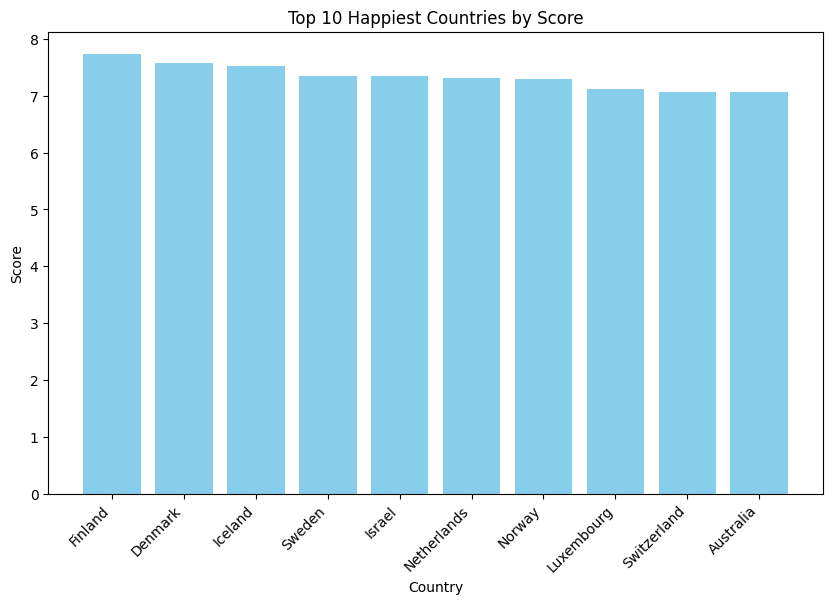

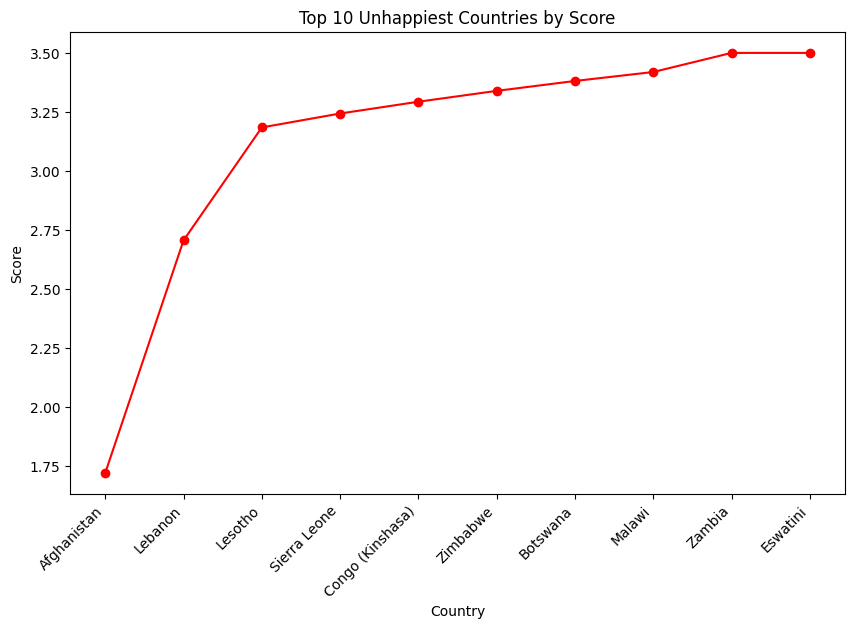

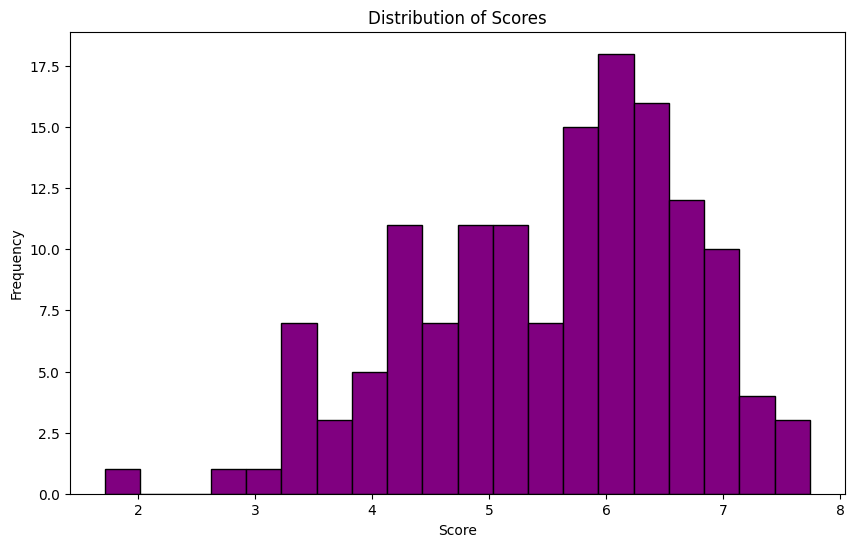

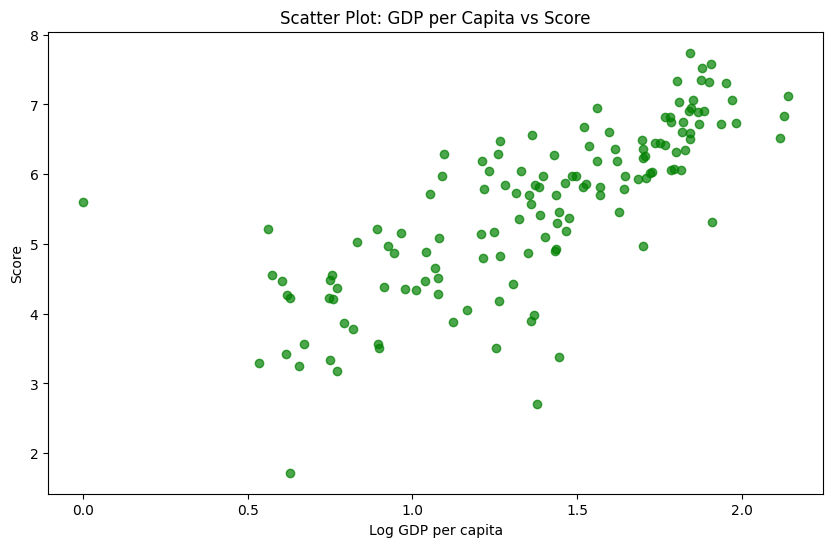

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_path = '/content/drive/MyDrive/WHR-2024-5CS037.csv'
data = pd.read_csv(dataset_path)
print("First 10 rows:")
print(data.head(10))
rows, cols = data.shape
print(f"\nNumber of rows: {rows}, Number of columns: {cols}")
print("\nColumns and their data types:")
print(data.dtypes)
print("\nBasic Statistics for 'score':")
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_score}")
max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"\nCountry with highest happiness score: {max_score_country}")
print(f"Country with lowest happiness score: {min_score_country}")

missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
print("\n4. Filtering and Sorting:")
print("a. Countries with Score greater than 7.5:")
filtered_data = data[data['score'] > 7.5]
print(filtered_data)

print("\nb. Top 10 countries (Score > 7.5, sorted by Log GDP per capita):")
sorted_filtered_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_filtered_data.head(10))

def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nDataset with 'Happiness Category' column:")
print(data.head())
happiest_countries = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(happiest_countries['Country name'], happiest_countries['score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()
unhappiest_countries = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-', color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='green', alpha=0.7)
plt.title('Scatter Plot: GDP per Capita vs Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.show()

<ipython-input-26-92601267af89>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['Composite Score'] = 0.40 * south_asia_data['Log GDP per capita'] + 0.30 * south_asia_data['Social support'] + 0.30 * south_asia_data['Healthy life expectancy']


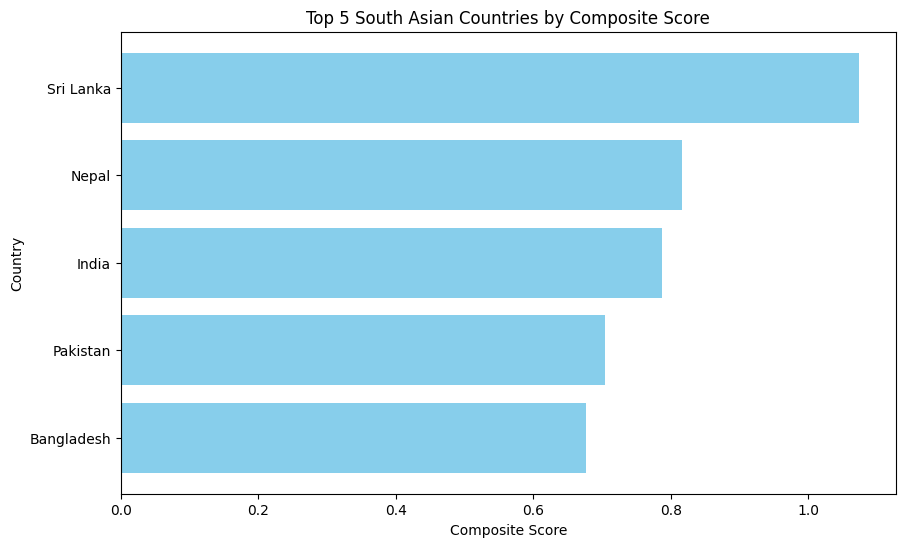

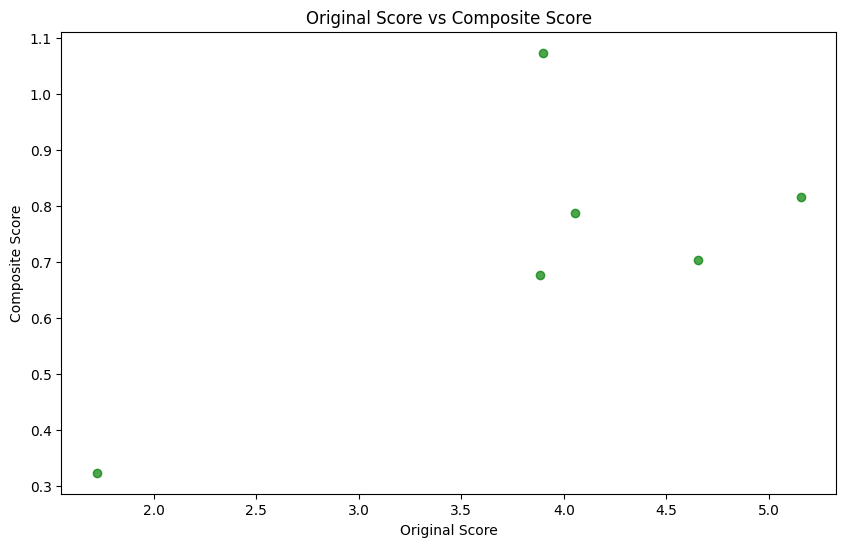

Correlation between Original Score and Composite Score: 0.6843877715791373


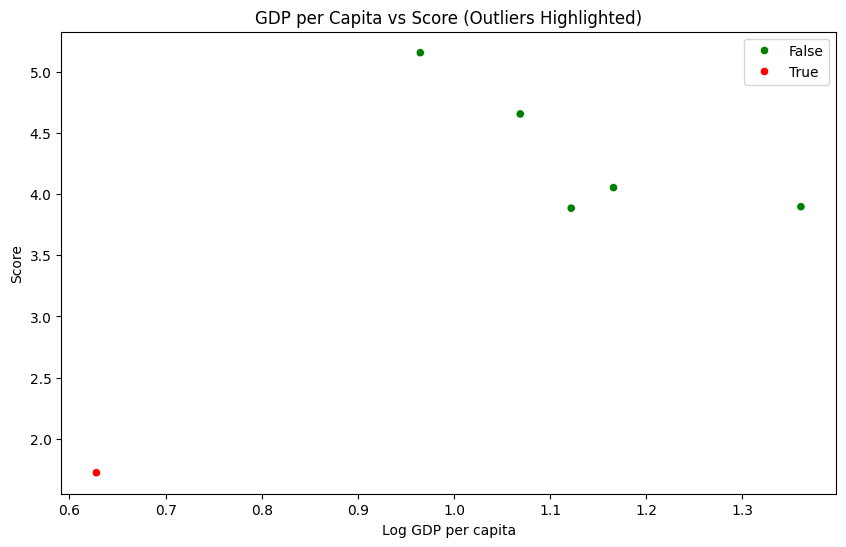

Outlier countries: ['Afghanistan']


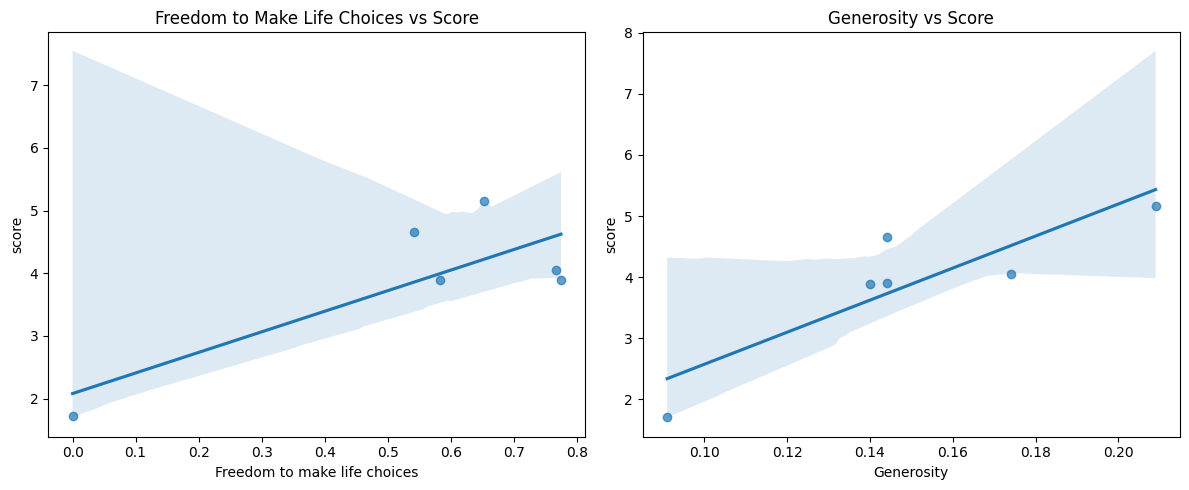

Correlation with Freedom to Make Life Choices: 0.8005185224163315
Correlation with Generosity: 0.874512371253192


<ipython-input-26-92601267af89>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

dataset_path = '/content/drive/MyDrive/WHR-2024-5CS037.csv'
data = pd.read_csv(dataset_path)
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

south_asia_data.to_csv('south_asia_data.csv', index=False)

south_asia_data['Composite Score'] = 0.40 * south_asia_data['Log GDP per capita'] + 0.30 * south_asia_data['Social support'] + 0.30 * south_asia_data['Healthy life expectancy']

ranked_countries = south_asia_data.sort_values(by='Composite Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ranked_countries['Country name'].head(5), ranked_countries['Composite Score'].head(5), color='skyblue')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data['score'], south_asia_data['Composite Score'], color='green', alpha=0.7)
plt.title('Original Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()
print("Correlation between Original Score and Composite Score:", south_asia_data['score'].corr(south_asia_data['Composite Score']))

Q1 = south_asia_data['score'].quantile(0.25)
Q3 = south_asia_data['score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = south_asia_data[(south_asia_data['score'] < lower_bound) | (south_asia_data['score'] > upper_bound)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, hue=south_asia_data.index.isin(outliers.index), palette={True: 'red', False: 'green'})
plt.title('GDP per Capita vs Score (Outliers Highlighted)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.show()

print("Outlier countries:", outliers['Country name'].tolist())

correlation_freedom = south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
correlation_generosity = south_asia_data['Generosity'].corr(south_asia_data['score'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data, scatter_kws={'alpha':0.7})
plt.title('Freedom to Make Life Choices vs Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_data, scatter_kws={'alpha':0.7})
plt.title('Generosity vs Score')

plt.tight_layout()
plt.show()

print("Correlation with Freedom to Make Life Choices:", correlation_freedom)
print("Correlation with Generosity:", correlation_generosity)


south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


South Asia Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144


<ipython-input-27-975dc7eb26b7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_sa['score'], y=top_3_sa['Country name'], palette='Blues_d')


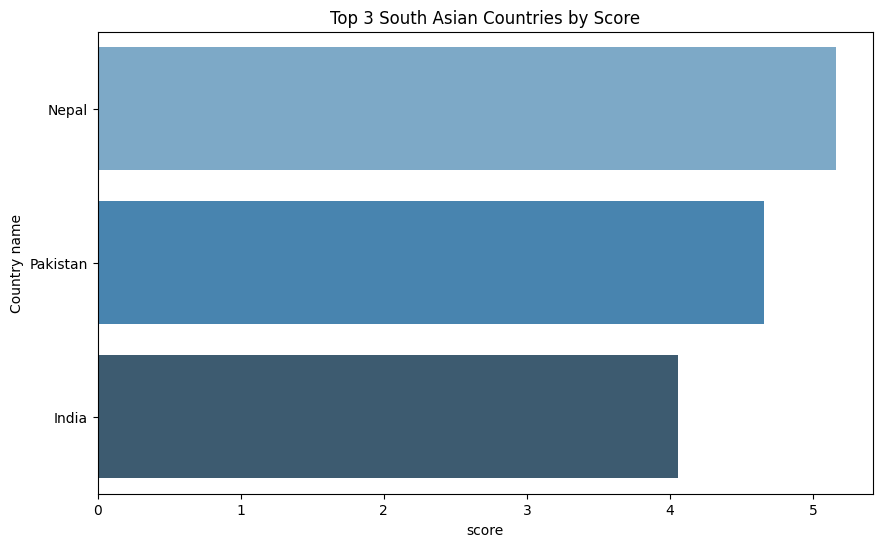

<ipython-input-27-975dc7eb26b7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_me['score'], y=top_3_me['Country name'], palette='Greens_d')


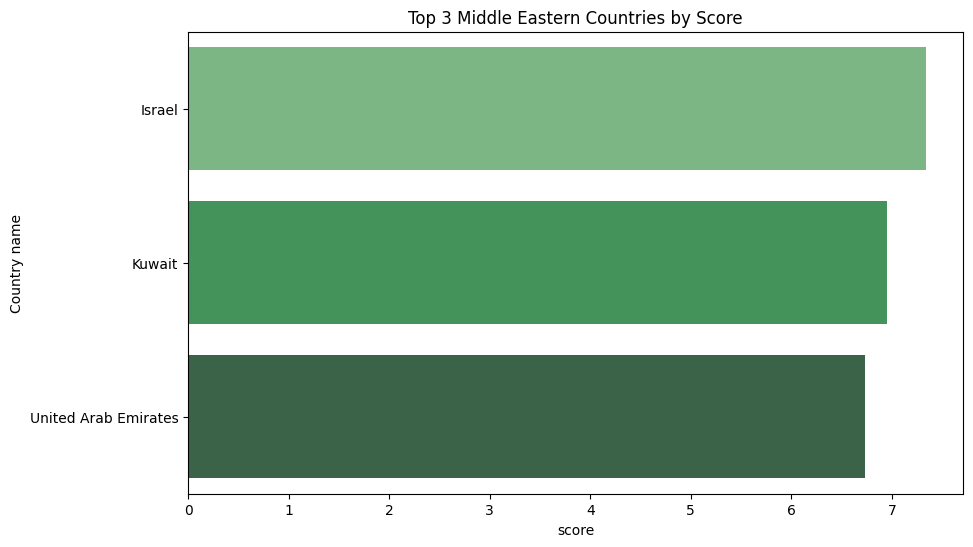

<ipython-input-27-975dc7eb26b7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison['Region'] = 'South Asia'
<ipython-input-27-975dc7eb26b7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data['Region'] = 'Middle East'
<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')
<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

Passing `

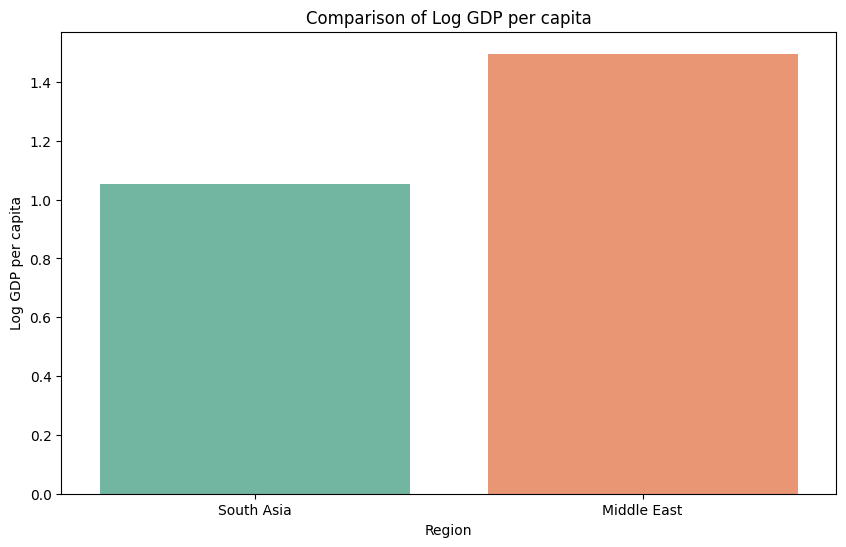

<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')
<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')


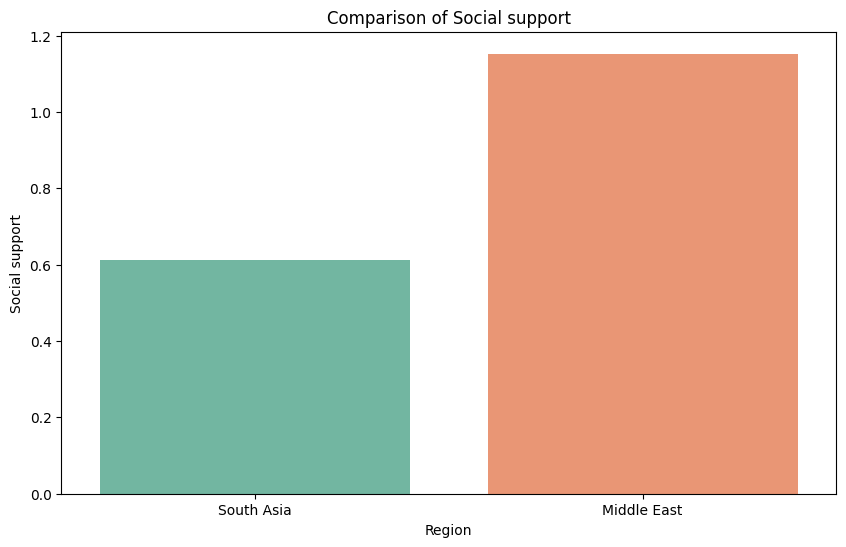

<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')
<ipython-input-27-975dc7eb26b7>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')


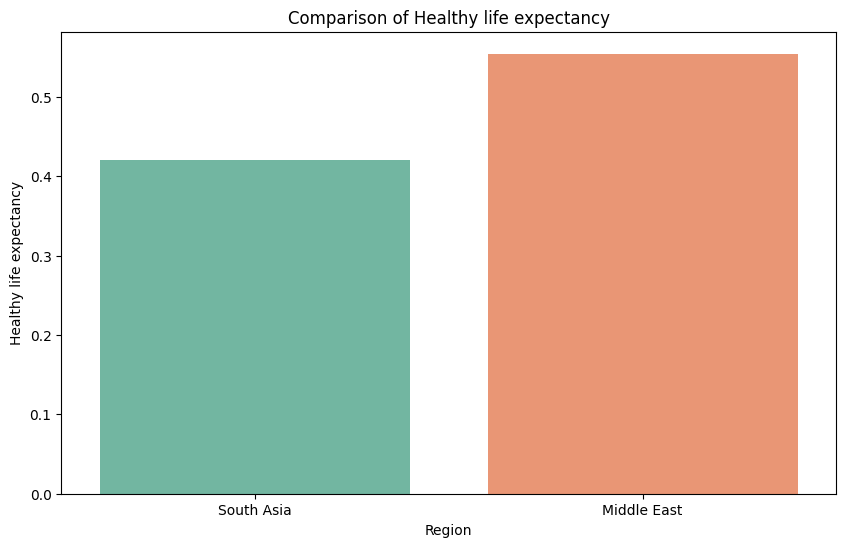

South Asia Range: 3.4370000000000003, Coefficient of Variation: 0.3021482883337427
Middle East Range: 4.634, Coefficient of Variation: 0.28938880812119405


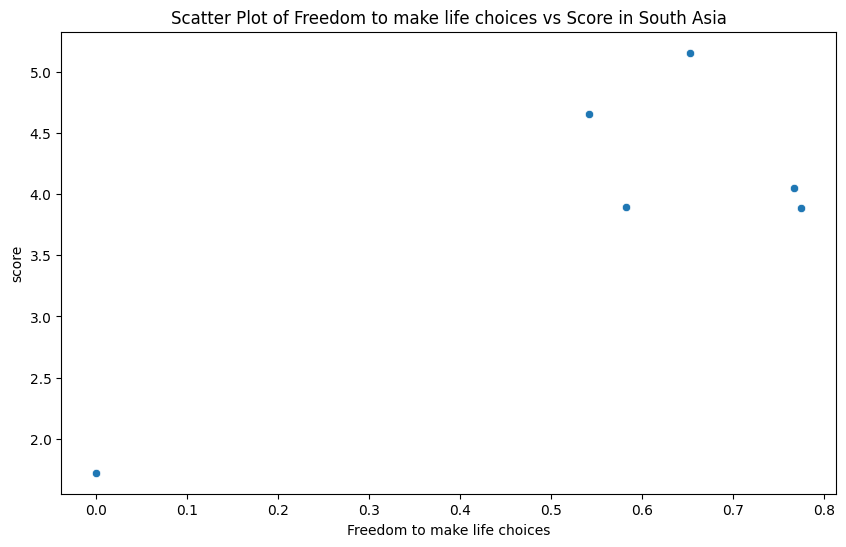

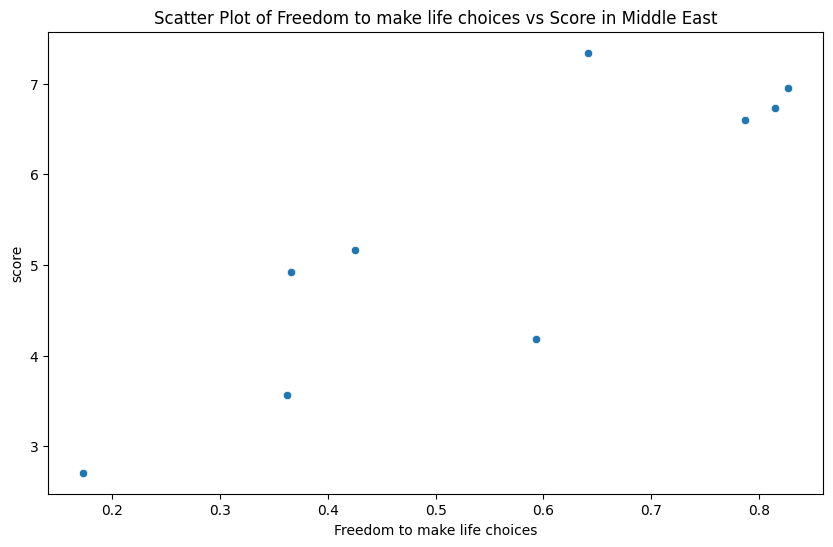

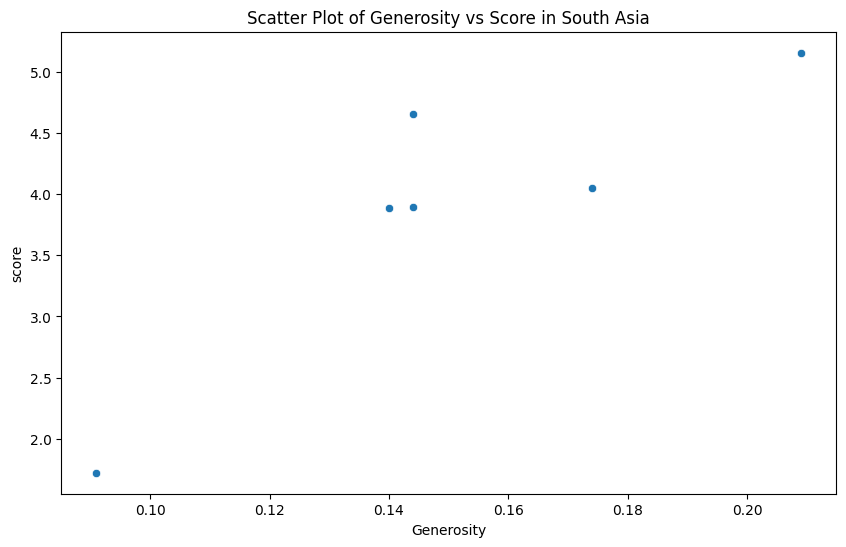

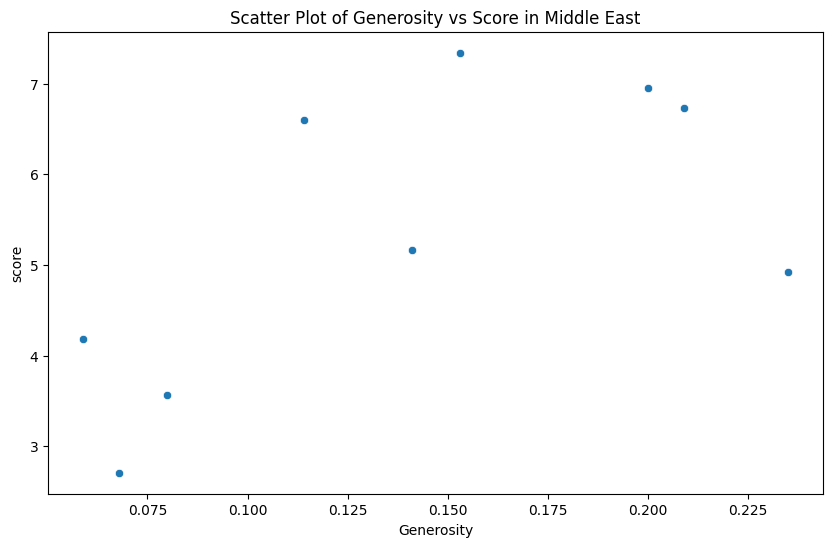

<ipython-input-27-975dc7eb26b7>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=comparison, palette='Set3')


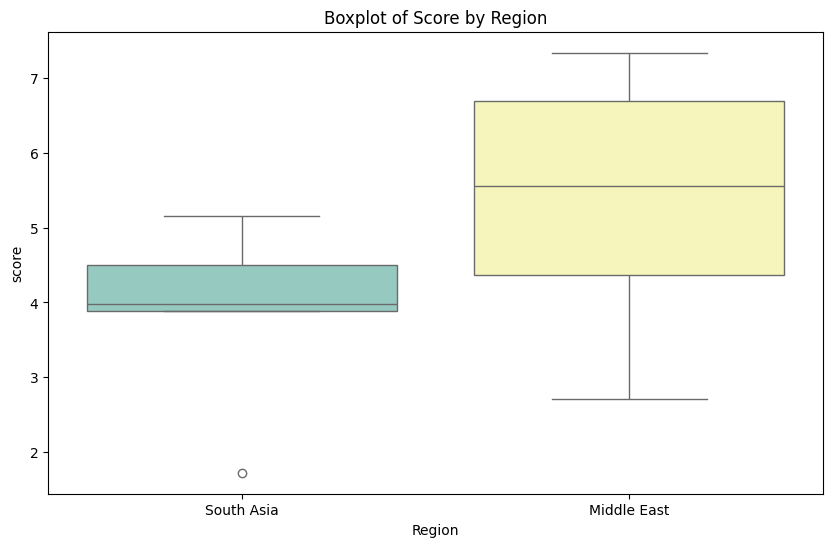

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset_path = '/content/drive/MyDrive/WHR-2024-5CS037.csv'
data = pd.read_csv(dataset_path)
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
middle_east_data.to_csv('/content/drive/MyDrive/Middle_East_Dataset.csv', index=False)

south_asia_mean = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].mean()
middle_east_mean = middle_east_data['score'].mean()
south_asia_std = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].std()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia Mean Score: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East Mean Score: {middle_east_mean}, Standard Deviation: {middle_east_std}")

top_3_sa = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])].nlargest(3, 'score')
bottom_3_sa = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])].nsmallest(3, 'score')
top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')

plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_sa['score'], y=top_3_sa['Country name'], palette='Blues_d')
plt.title('Top 3 South Asian Countries by Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_me['score'], y=top_3_me['Country name'], palette='Greens_d')
plt.title('Top 3 Middle Eastern Countries by Score')
plt.show()

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy'] # Changed 'Logged GDP per capita' to 'Log GDP per capita'
comparison = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]
comparison['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'
comparison = pd.concat([comparison, middle_east_data])

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Region', y=metric, data=comparison, ci=None, palette='Set2')
    plt.title(f'Comparison of {metric}')
    plt.show()

sa_range = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].max() - data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].min()
me_range = middle_east_data['score'].max() - middle_east_data['score'].min()

sa_cv = south_asia_std / south_asia_mean
me_cv = middle_east_std / middle_east_mean

print(f"South Asia Range: {sa_range}, Coefficient of Variation: {sa_cv}")
print(f"Middle East Range: {me_range}, Coefficient of Variation: {me_cv}")

correlation_sa = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])].drop(columns=['Country name']).corr() # Drop the 'Country name' column

correlation_me = middle_east_data.drop(columns=['Country name', 'Region']).corr()
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])][metric], y=data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'])
    plt.title(f'Scatter Plot of {metric} vs Score in South Asia')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=middle_east_data[metric], y=middle_east_data['score'])
    plt.title(f'Scatter Plot of {metric} vs Score in Middle East')
    plt.show()
q1_sa = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].quantile(0.25)
q3_sa = data[data['Country name'].isin(["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"])]['score'].quantile(0.75)
iqr_sa = q3_sa - q1_sa

q1_me = middle_east_data['score'].quantile(0.25)
q3_me = middle_east_data['score'].quantile(0.75)
iqr_me = q3_me - q1_me

outliers_sa = data[(data['score'] < q1_sa - 1.5 * iqr_sa) | (data['score'] > q3_sa + 1.5 * iqr_sa)]
outliers_me = middle_east_data[(middle_east_data['score'] < q1_me - 1.5 * iqr_me) | (middle_east_data['score'] > q3_me + 1.5 * iqr_me)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=comparison, palette='Set3')
plt.title('Boxplot of Score by Region')
plt.show()
